In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('XDEVS nV data - Sheet1.csv', parse_dates=['date'], dayfirst=True)

In [4]:
data.columns = ['date', 'val1', 'val2', 'val3', 'nV', 'V', 'val6',
       'val7', 'val8', 'temp1', 'temp2', 'temp3', 'temp4', 'amb_temp',
       'amb_rh', 'amb_pressure', 'box_temp', 'nvm_temp', 'tec_curr']

In [5]:
def pad_list(l, pad_length, pad_value=np.nan):
    if len(l) < pad_length:
        l.extend([pad_value] * (pad_length - len(l)))
    return l

number_of_groups = int(np.ceil(len(data)/1000))
groups = np.linspace(0, number_of_groups, (number_of_groups)*1000)
data['group'] = np.floor(groups)[:len(data)]

data_list_of_groups = data.groupby('group')['nV'].apply(lambda d: np.array(pad_list(list(d), 1000, 0.0)))
flat_data = [item for sublist in data_list_of_groups.to_numpy() for item in sublist]

data_matrix = np.array(flat_data).reshape(1000,number_of_groups)



Text(0, 0.5, 'nV')

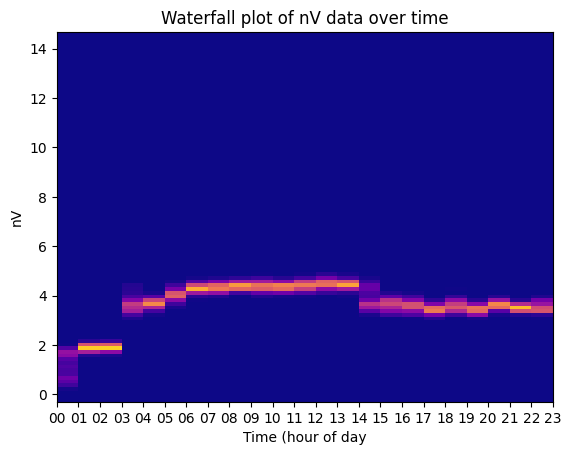

In [6]:



nbins = 100
bins = np.histogram(data_list_of_groups.iloc[0], bins=nbins, range=(min(flat_data), max(flat_data)))[1]
df_of_histograms = data_list_of_groups.apply(lambda a: np.histogram(a, bins=nbins, range=(min(flat_data), max(flat_data)))[0])
flat_histogram_data = [item for sublist in df_of_histograms.to_numpy() for item in sublist]
data_matrix = np.array(flat_histogram_data).reshape(number_of_groups, nbins)
# Ignore nulls used for padding in last bin
data_matrix[42, 2] = 0
data_matrix[42, :] *= data_matrix[41, :].sum() // data_matrix[42, :].sum()

x_labels = data.groupby('group')['date'].min().to_list() + [data.iloc[-1]['date']]
xlabels_str = [x.strftime('%H') for x in x_labels]
plt.pcolormesh(xlabels_str, bins, data_matrix.T, cmap='plasma')
plt.title('Waterfall plot of nV data over time')
plt.xlabel('Time (hour of day')
plt.ylabel('nV')
